# Import data  and perform preprocessing

In [1]:
import os as os

In [2]:
#changing the working directory
os.chdir("C:\\Users\\Kunal\\Desktop\\WD\\Dir_Py")

In [3]:
#Import the relevant packages

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

In [4]:
#list the files in the w/d
os.listdir()

['.ipynb_checkpoints',
 '03_Numpy_Notebook.ipynb',
 'abalone.csv',
 'bbchealth.txt',
 'boxplot.png',
 'Count plot data.png',
 'Credit_Risk_Test_data.csv',
 'Credit_Risk_Train_data.csv',
 'Credit_Risk_Validate_data.csv',
 'gender_submission.csv',
 'histogram data.png',
 'IRIS.csv',
 'missing data new.png',
 'missing data.png',
 'test.csv',
 'titanic.csv',
 'Titanic_Kaggle_LogReg.ipynb',
 'train.csv']

In [5]:
#read the data set

cr_train=pd.read_csv('Credit_Risk_Train_data.csv')

cr_test=pd.read_csv("Credit_Risk_Test_data.csv")

cr_valid=pd.read_csv("Credit_Risk_Validate_data.csv")

In [7]:
#check the dimension of the dataset

print("Dimension of the training data",cr_train.shape)
print("Dimension of the validation data",cr_valid.shape)
print("Dimension of the test data",cr_test.shape)

Dimension of the training data (614, 13)
Dimension of the validation data (367, 13)
Dimension of the test data (367, 12)


In [9]:
cr_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
cr_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
cr_valid.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'outcome'],
      dtype='object')

In [12]:
cr_train.columns==cr_valid.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False])

In [13]:
cr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [14]:
cr_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
outcome              367 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


In [16]:
#Rename the column outcome to Loan status
cr_valid.rename(columns={"outcome":"Loan_Status"},inplace=True)

In [18]:
cr_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
Loan_Status          367 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


In [19]:
cr_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
cr_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [21]:
cr_train.describe(include="all")#summary of the variables

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001432,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


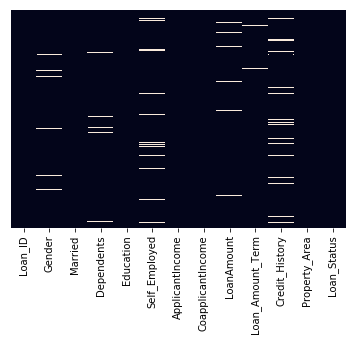

In [22]:
#using heatmap to figure out missing data if any
sns.heatmap(cr_train.isnull(), yticklabels=False,cbar=False)
plt.show()

In [23]:
cr_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [24]:
cr_train['Gender'].mode()

0    Male
dtype: object

In [25]:
cr_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [26]:
cr_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [27]:
cr_train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [28]:
cr_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [29]:
cr_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [31]:
#Imputation of categorical Variables for training data

cr_train['Gender'].fillna('Male',inplace=True)

cr_train['Married'].fillna('Yes',inplace=True)

cr_train['Dependents'].fillna('0',inplace=True)

cr_train['Education'].fillna('Graduate',inplace=True)

cr_train['Self_Employed'].fillna('No',inplace=True)

cr_train['Credit_History'].fillna(1,inplace=True)

In [32]:
#summing up all the null values in each column/variable
cr_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
#Compute the median value for loan amount

np.nanmedian(cr_train['LoanAmount'])

128.0

In [34]:
#Compute the median value for Loan amount term

np.nanmedian(cr_train['Loan_Amount_Term'])

360.0

In [35]:
#Imputation for Loan amount and Loan amount term

cr_train['LoanAmount'].fillna(128.0,inplace=True)

cr_train['Loan_Amount_Term'].fillna(360.0,inplace=True)


In [39]:
#Creating the dummy variables and dropping the old column
cr_train_dummy_cod=pd.get_dummies(cr_train.drop(['Loan_ID'],axis=1),drop_first=True)

In [40]:
cr_train_dummy_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Gender_Male                614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Dependents_3+              614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
Loan_Status_Y              614 non-null uint8
dtypes: float64(4), int64(1), uint8(10)
memory usage: 30.1 KB


In [41]:
cr_train_dummy_cod.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


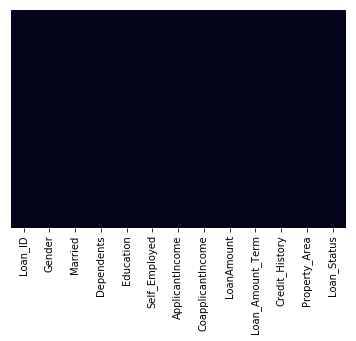

In [42]:
sns.heatmap(cr_train.isnull(), yticklabels=False,cbar=False)

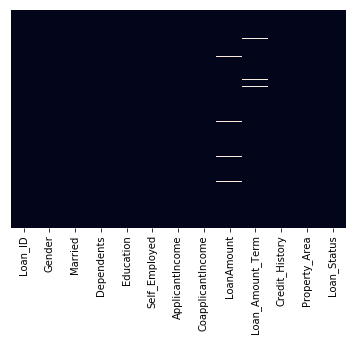

In [47]:
#using heatmap to figure out missing data if any
sns.heatmap(cr_valid.isnull(), yticklabels=False,cbar=False)

In [48]:
#Imputation of categorical Variables for validation data

cr_valid['Gender'].fillna('Male',inplace=True)

cr_valid['Married'].fillna('Yes',inplace=True)

cr_valid['Dependents'].fillna('0',inplace=True)

cr_valid['Education'].fillna('Graduate',inplace=True)

cr_valid['Self_Employed'].fillna('No',inplace=True)

cr_valid['Credit_History'].fillna(1,inplace=True)

In [49]:
#summing up all the missing values in each column
cr_valid.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
#Compute the median value for loan amount
np.nanmedian(cr_valid['LoanAmount'])

125.0

In [51]:
#Compute the median value for loan amount
np.nanmedian(cr_valid['Loan_Amount_Term'])

360.0

In [52]:
#Imputation for Loan amount and Loan amount term

cr_valid['LoanAmount'].fillna(125.0,inplace=True)

cr_valid['Loan_Amount_Term'].fillna(360.0,inplace=True)


In [53]:
cr_valid.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

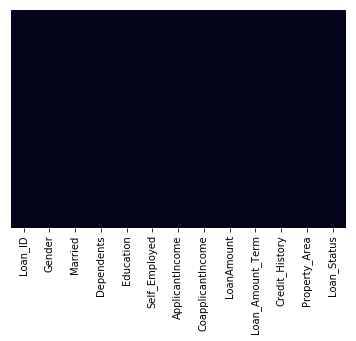

In [54]:
#using heatmap to figure out missing data if any
sns.heatmap(cr_valid.isnull(), yticklabels=False,cbar=False)

In [55]:
cr_valid_dummy_cod=pd.get_dummies(cr_valid.drop(['Loan_ID'],axis=1),drop_first=True)

In [56]:
cr_valid_dummy_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
ApplicantIncome            367 non-null int64
CoapplicantIncome          367 non-null int64
LoanAmount                 367 non-null float64
Loan_Amount_Term           367 non-null float64
Credit_History             367 non-null float64
Gender_Male                367 non-null uint8
Married_Yes                367 non-null uint8
Dependents_1               367 non-null uint8
Dependents_2               367 non-null uint8
Dependents_3+              367 non-null uint8
Education_Not Graduate     367 non-null uint8
Self_Employed_Yes          367 non-null uint8
Property_Area_Semiurban    367 non-null uint8
Property_Area_Urban        367 non-null uint8
Loan_Status_Y              367 non-null uint8
dtypes: float64(3), int64(2), uint8(10)
memory usage: 18.0 KB


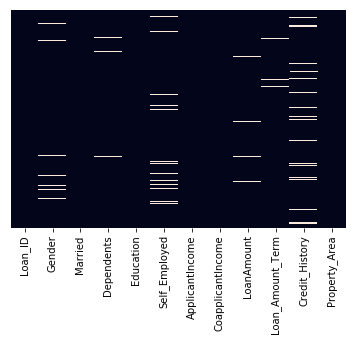

In [58]:
#using heatmap to figure out missing data if any
sns.heatmap(cr_test.isnull(), yticklabels=False,cbar=False)

In [59]:
#Imputation of categorical Variables for test data

cr_test['Gender'].fillna('Male',inplace=True)

cr_test['Married'].fillna('Yes',inplace=True)

cr_test['Dependents'].fillna('0',inplace=True)

cr_test['Education'].fillna('Graduate',inplace=True)

cr_test['Self_Employed'].fillna('No',inplace=True)

cr_test['Credit_History'].fillna(1,inplace=True)

In [60]:
cr_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [61]:
#Compute the median value for loan amount

np.nanmedian(cr_test['LoanAmount'])


125.0

In [62]:
#Compute the median value for Loan amount term

np.nanmedian(cr_test['Loan_Amount_Term'])

360.0

In [63]:
#Imputation for Loan amount and Loan amount term

cr_test['LoanAmount'].fillna(125.0,inplace=True)

cr_test['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [64]:
cr_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

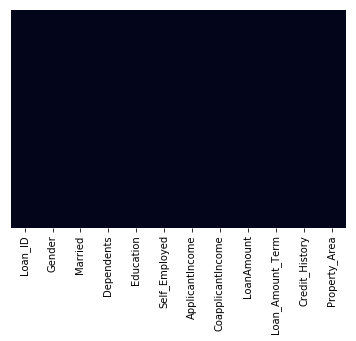

In [65]:
#using heatmap to figure out missing data if any
sns.heatmap(cr_test.isnull(), yticklabels=False,cbar=False)

In [67]:
cr_test_dummy_cod=pd.get_dummies(cr_test.drop(['Loan_ID'],axis=1),drop_first=True)

In [68]:
cr_test_dummy_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
ApplicantIncome            367 non-null int64
CoapplicantIncome          367 non-null int64
LoanAmount                 367 non-null float64
Loan_Amount_Term           367 non-null float64
Credit_History             367 non-null float64
Gender_Male                367 non-null uint8
Married_Yes                367 non-null uint8
Dependents_1               367 non-null uint8
Dependents_2               367 non-null uint8
Dependents_3+              367 non-null uint8
Education_Not Graduate     367 non-null uint8
Self_Employed_Yes          367 non-null uint8
Property_Area_Semiurban    367 non-null uint8
Property_Area_Urban        367 non-null uint8
dtypes: float64(3), int64(2), uint8(9)
memory usage: 17.6 KB


In [69]:
#Putting the validation data Target variable in a new object "Valid_Loan_Status"
Valid_Loan_Status=cr_valid_dummy_cod['Loan_Status_Y']

In [70]:
Valid_Loan_Status.value_counts()

1    290
0     77
Name: Loan_Status_Y, dtype: int64

In [71]:
#Dropping the column from the validation data set
del cr_valid_dummy_cod['Loan_Status_Y']

In [72]:
cr_valid_dummy_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
ApplicantIncome            367 non-null int64
CoapplicantIncome          367 non-null int64
LoanAmount                 367 non-null float64
Loan_Amount_Term           367 non-null float64
Credit_History             367 non-null float64
Gender_Male                367 non-null uint8
Married_Yes                367 non-null uint8
Dependents_1               367 non-null uint8
Dependents_2               367 non-null uint8
Dependents_3+              367 non-null uint8
Education_Not Graduate     367 non-null uint8
Self_Employed_Yes          367 non-null uint8
Property_Area_Semiurban    367 non-null uint8
Property_Area_Urban        367 non-null uint8
dtypes: float64(3), int64(2), uint8(9)
memory usage: 17.6 KB


# Descriptive statistics 

In [73]:
x=cr_train['ApplicantIncome']#subsetting the applicant income column and assigning to x

In [74]:
y=cr_train['LoanAmount']#subsetting the Loan amount column and assigning it to y

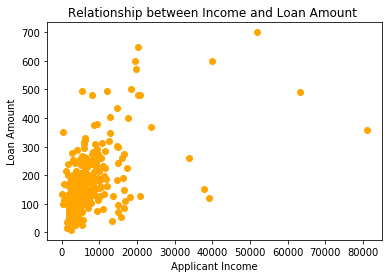

In [75]:
#check the relationship between the Income and Loan amount using a scatter plot
plt.scatter(x,y,color="orange")
plt.title("Relationship between Income and Loan Amount ")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

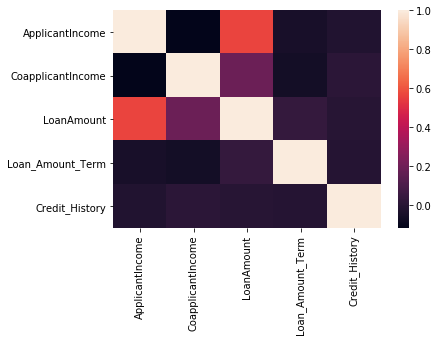

In [76]:
#Checking correlation between diff variables
sns.heatmap(cr_train.corr())

In [77]:
#Checking correlation between diff variables
cr_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


In [78]:
#frequency table
cr_train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

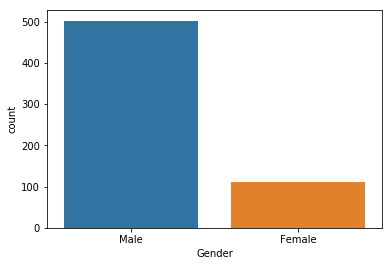

In [79]:
#do a count check for the categorical variable
sns.countplot(x="Gender",data=cr_train)
plt.show()

In [80]:
#frequency table
cr_train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

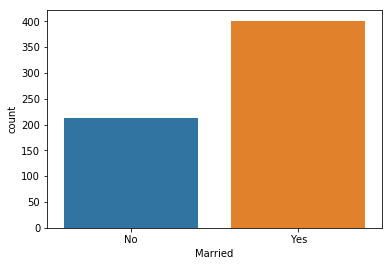

In [81]:
#do a count check for the categorical variable(Mrrried)
sns.countplot(x="Married",data=cr_train)
plt.show()

In [82]:
#frequency table
cr_train['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [83]:
cr_train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

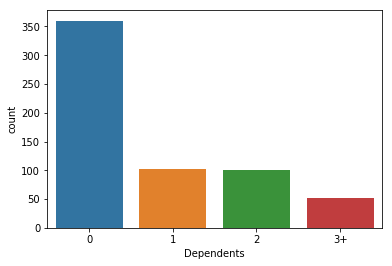

In [84]:
#do a count check for the categorical variable(Mrrried)
sns.countplot(x="Dependents",data=cr_train)
plt.show()

In [85]:
#Central Tendency of income
cr_train['ApplicantIncome'].median()

3812.5

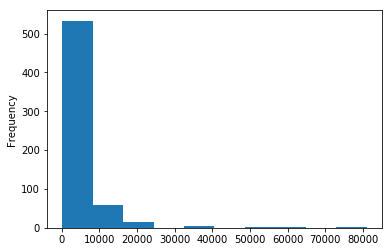

In [86]:
#histogram of the applicant income in the training dataset
cr_train['ApplicantIncome'].plot.hist()
plt.show()

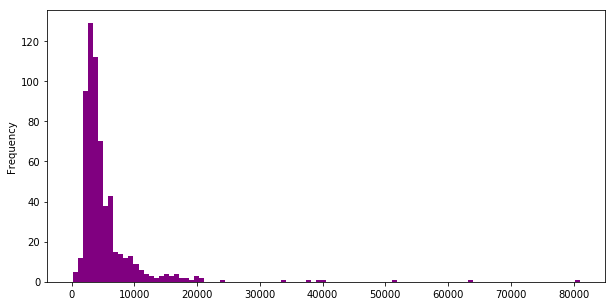

In [87]:
#effect of increasing the bin size 
#skewness evident
cr_train['ApplicantIncome'].plot.hist(bins=100,figsize=(10,5),color="purple")
plt.show()

In [88]:
#Crosstabulating the Gender and the loan status
pd.crosstab(cr_train['Gender'],cr_train['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


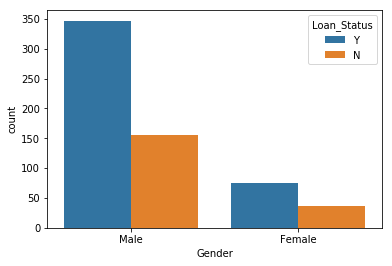

In [89]:
#Gender vs Loan approval status
sns.countplot(x="Gender",hue="Loan_Status",data=cr_train)

In [90]:
#Crosstabulating the Dependents and the loan status
pd.crosstab(cr_train['Dependents'],cr_train['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,113,247
1,36,66
2,25,76
3+,18,33


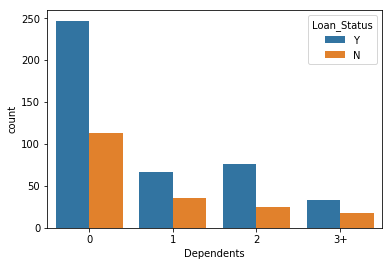

In [91]:
#Depenedents vs Loan status
sns.countplot(x="Dependents",hue="Loan_Status",data=cr_train)

In [92]:
#Crosstabulating the Education and the loan status
pd.crosstab(cr_train['Education'],cr_train['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


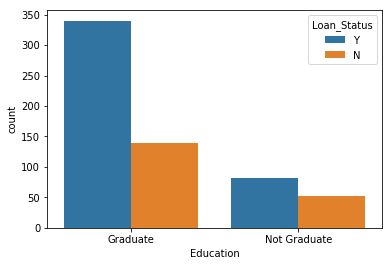

In [93]:
#Education vs loan status
sns.countplot(x="Education",hue="Loan_Status",data=cr_train)

In [94]:
#Crosstabulating the credit history and the loan status
pd.crosstab(cr_train['Credit_History'],cr_train['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


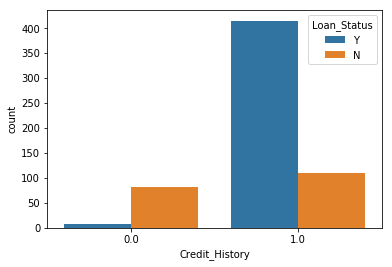

In [95]:
#credit history vs loan status
sns.countplot(x="Credit_History",hue="Loan_Status",data=cr_train)

In [96]:
#Crosstabulating the employment type and the loan status
pd.crosstab(cr_train['Self_Employed'],cr_train['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


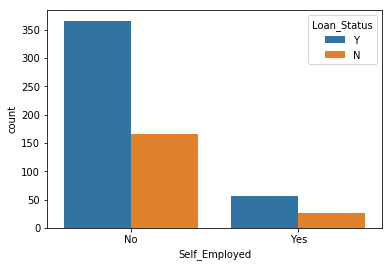

In [97]:
#self employment vs loan status
sns.countplot(x="Self_Employed",hue="Loan_Status",data=cr_train)#Crosstabulating the Gender and the loan status


In [98]:
#Crosstabulating the Propertry Area type and the loan status
pd.crosstab(cr_train['Property_Area'],cr_train['Loan_Status'])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


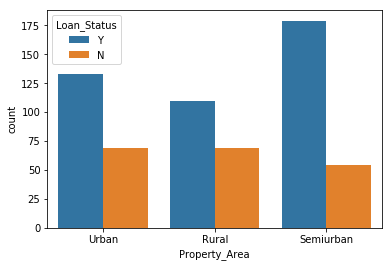

In [99]:
#Property area type vs Loan status
sns.countplot(x="Property_Area",hue="Loan_Status",data=cr_train)

In [100]:
#central value for co applicant income

cr_train['CoapplicantIncome'].median()

1188.5

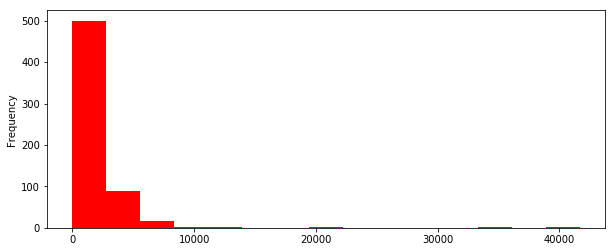

In [101]:
#Co applicant income histogram and binning 
cr_train['CoapplicantIncome'].plot.hist(bins=15,figsize=(10,4),color="red")

In [102]:
#central value for Loan Amount

cr_train['LoanAmount'].median()

128.0

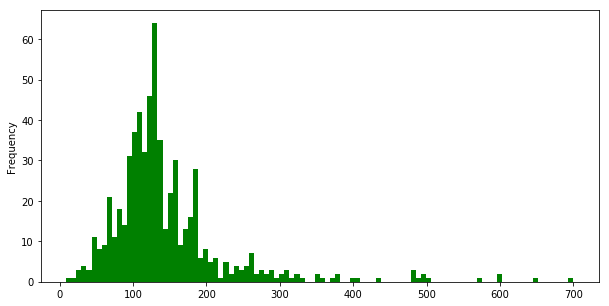

In [103]:
#Loan amount distribution 

cr_train['LoanAmount'].plot.hist(bins=100,figsize=(10,5),color="green")

In [104]:
#central value for Loan amount term

cr_train['Loan_Amount_Term'].median()

360.0

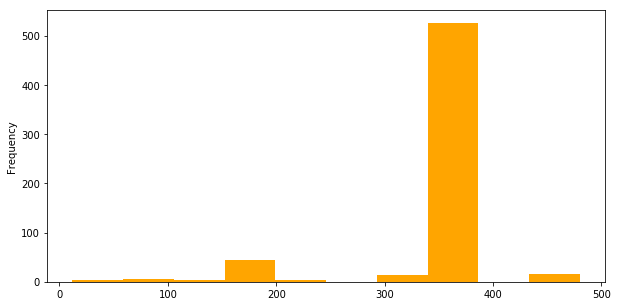

In [105]:
cr_train['Loan_Amount_Term'].plot.hist(bins=10,figsize=(10,5),color="orange")

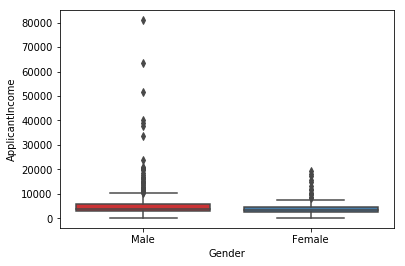

In [106]:
sns.boxplot(x="Gender",y="ApplicantIncome",data=cr_train,palette="Set1")

# Creating the Logistic Regression Model

In [107]:
#cr_train_dummy_cod.head()

In [108]:
#Segregating the input and the output variable by dropping the Loan status column from the cr_traing dummy dataset

cr_train_inp=cr_train_dummy_cod.drop(['Loan_Status_Y'],axis=1)

cr_train_out=cr_train_dummy_cod['Loan_Status_Y']

In [109]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(cr_train_inp,cr_train_out)

C:\Users\Kunal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Prediction using the logistic regression model

In [110]:
cr_test_dummy_cod.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [111]:
cr_train_dummy_cod.shape

(614, 15)

In [112]:
cr_valid_dummy_cod.shape

(367, 14)

In [113]:
cr_test_dummy_cod.shape

(367, 14)

In [114]:
#cr_train_dummy_cod.columns==cr_test_dummy_cod.columns

In [115]:
#cr_train_dummy_cod.columns==cr_valid_dummy_cod.columns

In [116]:
cr_train_dummy_cod.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [117]:
cr_test_dummy_cod.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [118]:
prediction=log_reg.predict(cr_test_dummy_cod)

In [119]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# Model Evaluation using performance measures

In [120]:
from sklearn.metrics import classification_report

In [121]:
#Performance measures/ratios
classification_report(Valid_Loan_Status,prediction)

'              precision    recall  f1-score   support\n\n           0       0.98      0.73      0.84        77\n           1       0.93      1.00      0.96       290\n\n   micro avg       0.94      0.94      0.94       367\n   macro avg       0.96      0.86      0.90       367\nweighted avg       0.94      0.94      0.94       367\n'

In [122]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

In [128]:
prediction_valid=log_reg.predict(cr_valid_dummy_cod)

In [129]:
confusion_matrix(Valid_Loan_Status,prediction_valid)

array([[ 56,  21],
       [  1, 289]], dtype=int64)

In [130]:
prediction_test=log_reg.predict(cr_test_dummy_cod)

In [131]:
prediction_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# Reporting the final accuracy of the model

In [132]:
from sklearn.metrics import accuracy_score

In [133]:
accuracy_score(Valid_Loan_Status,prediction)*100

94.00544959128065

# Add a column for the predicted class in the test data set

In [134]:
cr_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [136]:
cr_test['Predictions']=prediction

In [137]:
cr_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Predictions'],
      dtype='object')

In [138]:
cr_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predictions
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [ ]:
cr_test

In [ ]:
#https://en.wikipedia.org/wiki/Confusion_matrix